# Aux 4
## AS4501-1 Astroinformatics

Profs: Valentino Gonzalez, Francisco Forster.

T.A: Melissa Fuentealba.

# Contents

- Convolutional Neural Networks
  - Tensorflow Keras

# Load tensorflow

In [1]:
# Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Basics
import matplotlib.pyplot as plt
import numpy as np
import os
tf.__version__

'2.10.0'

In [2]:
print(tf.config.experimental.list_physical_devices("GPU"))

[]


# Load CIFAR100

- This dataset has 100 classes containing 600 images each. 

  - There are 500 training images and 100 testing images per class. 

- The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 25s 0us/step


In [4]:
len(np.unique(train_labels))

100

The data set must be preprocessed before training the network. If you inspect the images in the training set, you will find that the pixel values are between 0 and 255.

In [5]:
np.min(train_images), np.max(test_images)

(0, 255)

In [6]:
# Normalize pixel values to be between 0 and 1 before feeding them to the neural network model
train_images, test_images = train_images / 255.0 , test_images / 255.0

In [7]:
np.min(train_images), np.max(test_images)

(0.0, 1.0)

In [8]:
# images of 32 x 32 pixels with 3 filters (RGB)
train_images.shape, test_images.shape, len(train_labels), len(test_labels)

((50000, 32, 32, 3), (10000, 32, 32, 3), 50000, 10000)

In [9]:
# n° images per class * n° of classes
500 * 100, 100 * 100

(50000, 10000)

# There are 20 superclasses in CIFAR100: 

Aquatic mammals, fish, flowers, food containers, fruit and veg, electrical devices, household furniture, insects, large carnivores, man-made outdoor scenes, natural outdoor scenes, omnivores and herbivores, medium-sized mammals, non-insect invertebrates, people, reptiles, small mammals, trees, vehicles 1 and vehicles 2.

With 100 classes:

In [10]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 
              'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
              'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 
              'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 
              'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 
              'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 
              'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
              
label2name = dict(zip(range(len(class_names)), class_names))

In [11]:
label2name

{0: 'apple',
 1: 'aquarium_fish',
 2: 'baby',
 3: 'bear',
 4: 'beaver',
 5: 'bed',
 6: 'bee',
 7: 'beetle',
 8: 'bicycle',
 9: 'bottle',
 10: 'bowl',
 11: 'boy',
 12: 'bridge',
 13: 'bus',
 14: 'butterfly',
 15: 'camel',
 16: 'can',
 17: 'castle',
 18: 'caterpillar',
 19: 'cattle',
 20: 'chair',
 21: 'chimpanzee',
 22: 'clock',
 23: 'cloud',
 24: 'cockroach',
 25: 'couch',
 26: 'crab',
 27: 'crocodile',
 28: 'cup',
 29: 'dinosaur',
 30: 'dolphin',
 31: 'elephant',
 32: 'flatfish',
 33: 'forest',
 34: 'fox',
 35: 'girl',
 36: 'hamster',
 37: 'house',
 38: 'kangaroo',
 39: 'keyboard',
 40: 'lamp',
 41: 'lawn_mower',
 42: 'leopard',
 43: 'lion',
 44: 'lizard',
 45: 'lobster',
 46: 'man',
 47: 'maple_tree',
 48: 'motorcycle',
 49: 'mountain',
 50: 'mouse',
 51: 'mushroom',
 52: 'oak_tree',
 53: 'orange',
 54: 'orchid',
 55: 'otter',
 56: 'palm_tree',
 57: 'pear',
 58: 'pickup_truck',
 59: 'pine_tree',
 60: 'plain',
 61: 'plate',
 62: 'poppy',
 63: 'porcupine',
 64: 'possum',
 65: 'rabbit',

In [12]:
train_labels[0:5], test_labels[0:5]

(array([[19],
        [29],
        [ 0],
        [11],
        [ 1]]),
 array([[49],
        [33],
        [72],
        [51],
        [71]]))

# Superclass: Flowers

---

I want to work with just one of the superclasses first because otherwise, I will have a 100 of labels...

---

There are 5 types of flowers: 
- orchids (orquideas)
- poppies (amapolas)
- roses (rosas)
- sunflowers (girasoles)
- tulips (tulipanes).

In [13]:
class_flowers = ['orchids', 'poppies', 'roses', 'sunflowers', 'tulips']
idxs_flowers = [54, 62, 70, 82, 92]
label2name_flowers = dict(zip(range(len(class_flowers)), class_flowers))

In [14]:
def one_superclass(idxs):
    """
    Function that separates one superclass from the rest. 
    Parameters:
    - list of indexes of the desired classes (from one superclass)
    Return:
    - train set
    - train labels
    - test set
    - test labels 
    """
    idx_train = []
    for i in range(len(train_labels)):
        if train_labels[i] in idxs:
            idx_train.append(True)
        else:
            idx_train.append(False)
    
    idx_test = []
    for i in range(len(test_labels)):
        if test_labels[i] in idxs:
            idx_test.append(True)
        else:
            idx_test.append(False)

    train = train_images[idx_train]
    test = test_images[idx_test]
    train_lbls = train_labels[idx_train]
    test_lbls = test_labels[idx_test]
    return train, train_lbls, test, test_lbls

In [15]:
train_flowers, train_labels_flowers, test_flowers, test_labels_flowers  = one_superclass(idxs_flowers)

In [16]:
train_flowers.shape, test_flowers.shape

((2500, 32, 32, 3), (500, 32, 32, 3))

# Labels

In [17]:
label2name_flowers

{0: 'orchids', 1: 'poppies', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

In [18]:
train_labels_flowers[0], test_labels_flowers[0]

(array([82]), array([92]))

In [19]:
idxs_flowers

[54, 62, 70, 82, 92]

In [20]:
def change_idxs(dataset, idxs):
    """
    Function that transforms the indexes (integers) of the classes.
    Parameters:
    - dataset
    - indexes
    Return:
    - dataset with its indexes in order from 0 to len(dataset) - 1.
    """
    for i in range(len(dataset)):  # i = 0, 1, 2, 3, 4, ..., 500, ..., 2500 (...)
        for j in range(len(idxs)):   # j = 0, 1, 2, 3, 4 (...)
            if dataset[i] == idxs[j]:
                dataset[i] = j
    return dataset

In [21]:
train_labels_flowers = change_idxs(train_labels_flowers, idxs_flowers)
test_labels_flowers =  change_idxs(test_labels_flowers, idxs_flowers)

In [22]:
train_labels_flowers[0], test_labels_flowers[0]

(array([3]), array([4]))

Let's visualize how the different classes of flowers look:

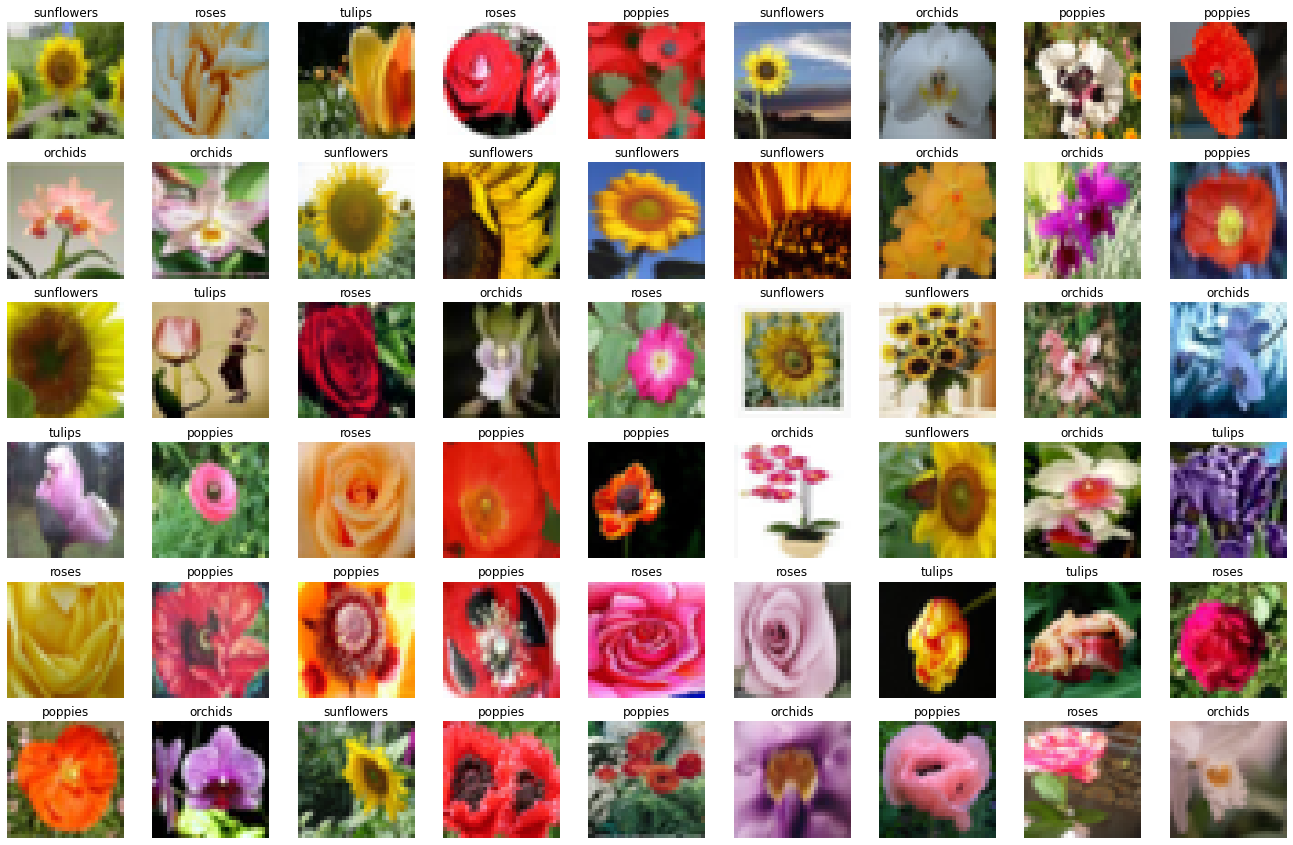

In [23]:
fig, ax = plt.subplots(ncols=9, nrows=6, figsize=(23, 15))
for i in range(6):
    for j in range(9):
        idx = 9 * i + j
        ax[i, j].imshow(train_flowers[idx])
        ax[i, j].axis(False)
        ax[i, j].set_title(label2name_flowers[train_labels_flowers[idx][0]], fontsize=12) 

# Convolutional Neural Network

---

The basic building blocks of a neural network are the layers. Layers extract representations from the dataset that is fed to them. 

Building the neural network requires configuring the model layers and then building the model.

---

- Conv2D - 2D convolution layer (e.g. spatial convolution over images): This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
  - activation: Activation function to use. 
    
    In our case we use Relu (The rectified linear activation function) which is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 

- MaxPooling2D: Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window.
  - pool_size: integer or tuple of 2 integers, window size over which to take the maximum. In our case windows of 2x2.

- Flatten: Flattens the input. Does not affect the batch size.

- Dense: Just a regular densely-connected NN layer.
  - activation: Activation function to use. If you don't specify anything, no activation is applied.

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [26]:
# N° of parameters Conv2D (3x3)
# shape of the kernel * n° of inputs * n° of outputs + bias
3*3 * 3 * 32 + 32

896

In [27]:
# N° of parameters Conv2D (3x3)
3*3 * 32 * 64 + 64

18496

In [28]:
# Flatten shape
5 * 5 * 64 

1600

In [29]:
# N° of parameters Dense 
# len input * len output + bias
64 * 5 + 5

325

In [30]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Create checkpoints to be able to load the trained models:

In [31]:
checkpoint_path = "training_flowers/cp-{epoch:04d}.ckpt" # each epoch will be saved
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Compile the model

---

Before the model is ready to train, a few more configurations are needed. These are added during the model build step.

---

- Loss function: This measures how accurate the model is during training. You want to minimize this function to steer the model in the right direction.
  - categorical cross entropy CCE: Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided as integers.

- Optimizer: This is how the model updates based on the dataset it sees and the loss function.
  - Adam

- Metrics: Used to monitor training and testing steps. 
  - Accuracy: The fraction of images that are correctly classified.




In [32]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# Train the model

To start training, call the model.fit() method, it is so called because it fits the model to the training dataset:

In [33]:
history = model.fit(train_flowers, train_labels_flowers,
                    epochs=10, 
                    validation_data=(test_flowers, test_labels_flowers), 
                    callbacks=cp_callback)

Epoch 1/10
75/79 [===========================>..] - ETA: 0s - loss: 1.3370 - accuracy: 0.4346
Epoch 1: saving model to training_flowers/cp-0001.ckpt
79/79 [==============================] - 2s 16ms/step - loss: 1.3313 - accuracy: 0.4356 - val_loss: 1.1591 - val_accuracy: 0.5280
Epoch 2/10
76/79 [===========================>..] - ETA: 0s - loss: 1.1822 - accuracy: 0.5082
Epoch 2: saving model to training_flowers/cp-0002.ckpt
79/79 [==============================] - 1s 14ms/step - loss: 1.1837 - accuracy: 0.5080 - val_loss: 1.1098 - val_accuracy: 0.5260
Epoch 3/10
76/79 [===========================>..] - ETA: 0s - loss: 1.1086 - accuracy: 0.5469
Epoch 3: saving model to training_flowers/cp-0003.ckpt
79/79 [==============================] - 1s 13ms/step - loss: 1.1126 - accuracy: 0.5424 - val_loss: 1.0425 - val_accuracy: 0.5580
Epoch 4/10
77/79 [============================>.] - ETA: 0s - loss: 1.0536 - accuracy: 0.5743
Epoch 4: saving model to training_flowers/cp-0004.ckpt
79/79 [=======

Plot the loss function:

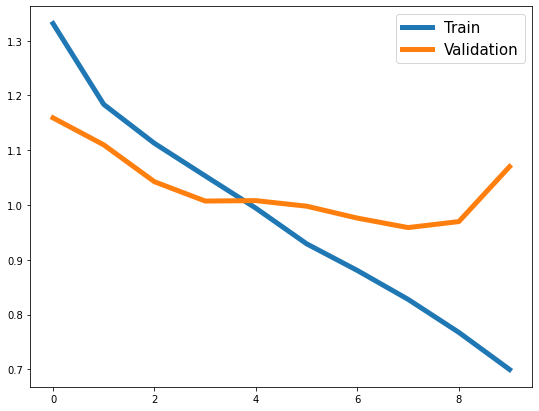

In [34]:
fig, ax = plt.subplots(figsize=(9,7))
ax.plot(history.history['loss'], label="Train", lw=5)
ax.plot(history.history['val_loss'], label="Validation", lw=5)
ax.legend(fontsize=15);

Find the best model:

In [35]:
np.argmin(history.history["val_loss"])

7

Load the best model:

In [36]:
print("Loading model %i" % (np.argmin(history.history["val_loss"]) + 1))
model.load_weights('%s/cp-%04d.ckpt' % (checkpoint_dir, np.argmin(history.history["val_loss"]) + 1))

Loading model 8


Evaluate the model again to check it's correct:



In [37]:
model.evaluate(test_flowers, test_labels_flowers, verbose=2)

16/16 - 0s - loss: 0.9588 - accuracy: 0.6200 - 93ms/epoch - 6ms/step


[0.9588162899017334, 0.6200000047683716]

# Make predictions

A prediction is an array of X numbers. These represent the level of "confidence" of the model about the images of each of the X items. 

In our case X = 5 (classes of flowers).

In [38]:

predictions = model.predict(test_flowers)

16/16 [==============================] - 0s 5ms/step


In [39]:
predictions[2], len(predictions[2])

(array([  0.08225371,  -3.2611248 ,   1.9658422 , -11.582213  ,
         -0.6083642 ], dtype=float32),
 5)

You can check which one has the highest confidence level:

In [40]:
np.argmax(predictions[2]), label2name_flowers[np.argmax(predictions[2])]

(2, 'roses')

In [41]:
test_labels_flowers[2]

array([2])

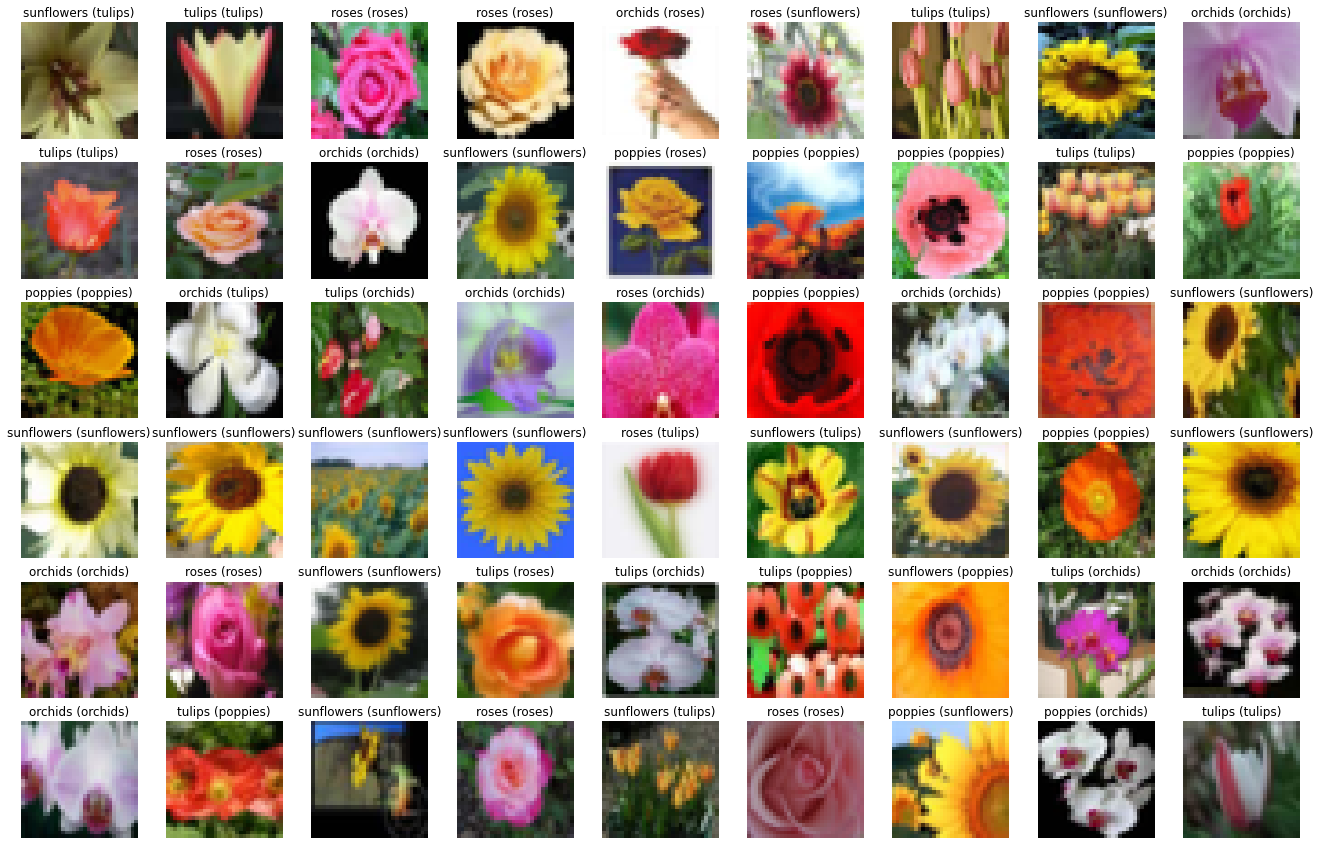

In [42]:
fig, ax = plt.subplots(ncols=9, nrows=6, figsize=(23, 15))
for i in range(6):
    for j in range(9):
        idx = 9 * i + j
        ax[i, j].imshow(test_flowers[idx])
        ax[i, j].axis(False)
        ax[i, j].set_title("%s (%s)" % (label2name_flowers[np.argmax(predictions[idx])], label2name_flowers[test_labels_flowers[idx][0]]), fontsize=12)

# Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=12)
    plt.yticks(tick_marks, classes, size=12)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", size=15)

    plt.tight_layout()
    plt.ylabel('True label', size=15)
    plt.xlabel('Predicted label', size=15)

Confusion matrix, without normalization


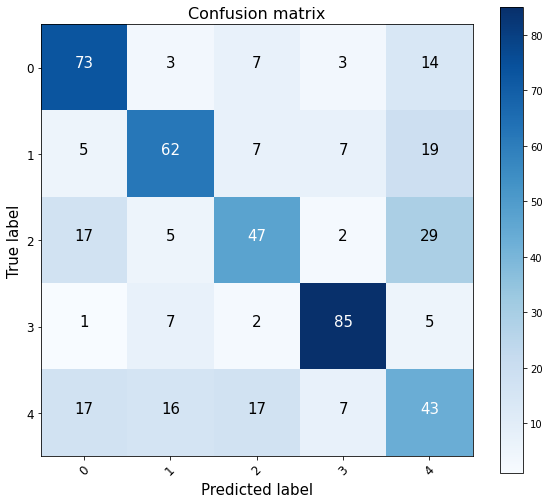

In [44]:
plt.figure(figsize=(8,7))
plot_confusion_matrix(confusion_matrix(test_labels_flowers, np.argmax(predictions, axis=1)), range(5))

In [45]:
label2name_flowers

{0: 'orchids', 1: 'poppies', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

# Superclass: Large man-made outdoor things and large natural outdoor scenes

In [46]:
class_outdoor = ['bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea' ]
idxs_outdoor = [12, 17, 37, 68, 76, 23, 33, 49, 60, 71]
label2name_outdoor = dict(zip(range(len(class_outdoor)), class_outdoor))

In [47]:
label2name_outdoor

{0: 'bridge',
 1: 'castle',
 2: 'house',
 3: 'road',
 4: 'skyscraper',
 5: 'cloud',
 6: 'forest',
 7: 'mountain',
 8: 'plain',
 9: 'sea'}

In [48]:
train_outdoor, train_labels_outdoor, test_outdoor, test_labels_outdoor  = one_superclass(idxs_outdoor)

In [49]:
train_labels_outdoor = change_idxs(train_labels_outdoor, idxs_outdoor)
test_labels_outdoor =  change_idxs(test_labels_outdoor, idxs_outdoor)

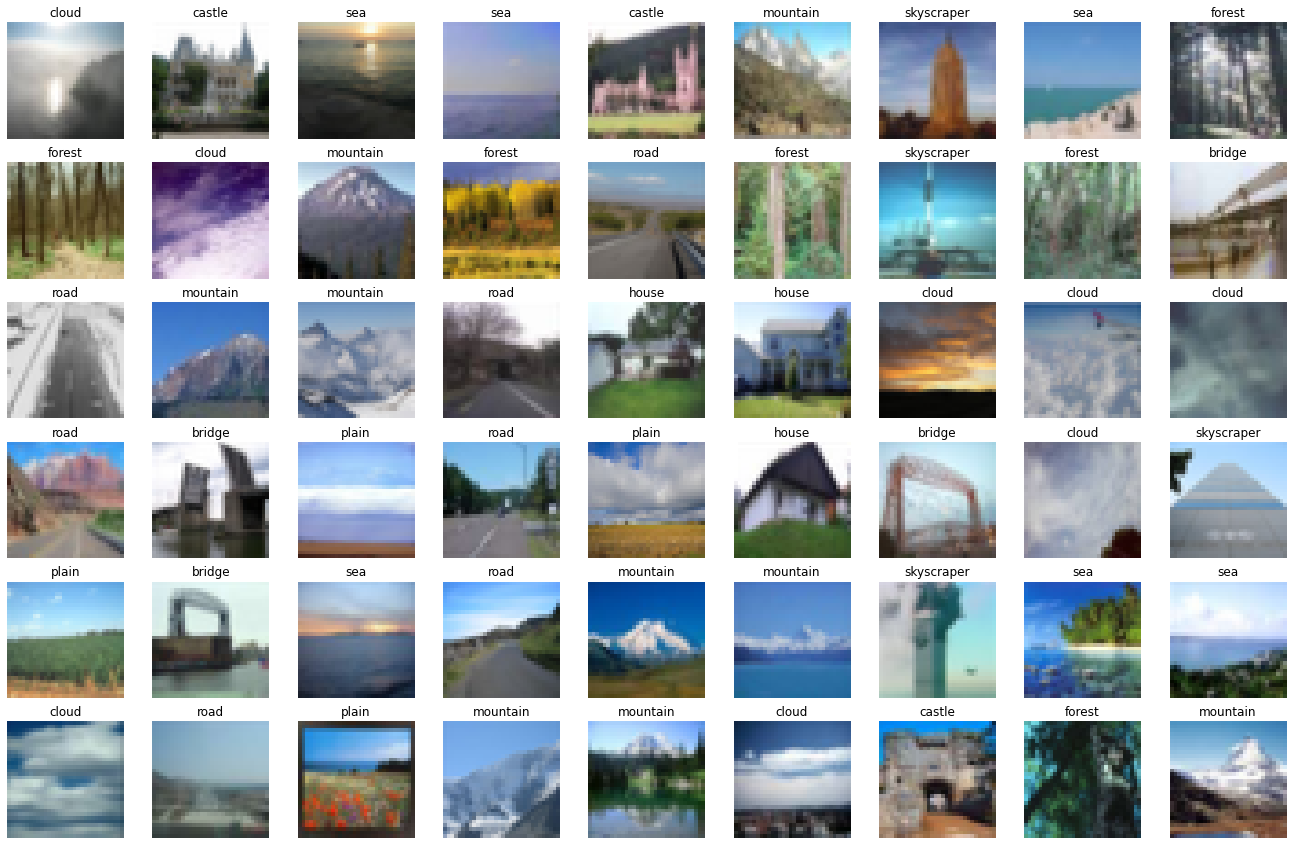

In [50]:
fig, ax = plt.subplots(ncols=9, nrows=6, figsize=(23, 15))
for i in range(6):
    for j in range(9):
        idx = 9 * i + j
        ax[i, j].imshow(train_outdoor[idx])
        ax[i, j].axis(False)
        ax[i, j].set_title(label2name_outdoor[train_labels_outdoor[idx][0]], fontsize=12) 

# Convolutional Neural Network
---


- Conv2D - 2D convolution layer (e.g. spatial convolution over images): This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
  - activation: Activation function to use. In our case: Relu.

- MaxPooling2D: Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window.
  - pool_size: integer or tuple of 2 integers, window size over which to take the maximum. In our case windows of 2x2.

- Flatten: Flattens the input. Does not affect the batch size.

- Dense: Just a regular densely-connected NN layer.
  - activation: Activation function to use. If you don't specify anything, no activation is applied.


In [51]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        16448     
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                692288    
                                                      

In [53]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [54]:
checkpoint_path = "training_outdoor/cp-{epoch:04d}.ckpt" # each epoch will be saved
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Compile the model

In [55]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# Train the model

In [56]:
history = model.fit(train_outdoor, train_labels_outdoor, 
                    epochs=10, 
                    validation_data=(test_outdoor, test_labels_outdoor), 
                    callbacks=cp_callback)

Epoch 1/10
152/157 [============================>.] - ETA: 0s - loss: 1.8223 - accuracy: 0.3549
Epoch 1: saving model to training_outdoor/cp-0001.ckpt
157/157 [==============================] - 2s 13ms/step - loss: 1.8119 - accuracy: 0.3582 - val_loss: 1.4778 - val_accuracy: 0.5020
Epoch 2/10
154/157 [============================>.] - ETA: 0s - loss: 1.3420 - accuracy: 0.5420
Epoch 2: saving model to training_outdoor/cp-0002.ckpt
157/157 [==============================] - 2s 11ms/step - loss: 1.3404 - accuracy: 0.5420 - val_loss: 1.3562 - val_accuracy: 0.5300
Epoch 3/10
154/157 [============================>.] - ETA: 0s - loss: 1.1463 - accuracy: 0.6082
Epoch 3: saving model to training_outdoor/cp-0003.ckpt
157/157 [==============================] - 2s 12ms/step - loss: 1.1469 - accuracy: 0.6090 - val_loss: 1.2010 - val_accuracy: 0.5940
Epoch 4/10
157/157 [==============================] - ETA: 0s - loss: 1.0354 - accuracy: 0.6456
Epoch 4: saving model to training_outdoor/cp-0004.ckpt


Plot the loss function:

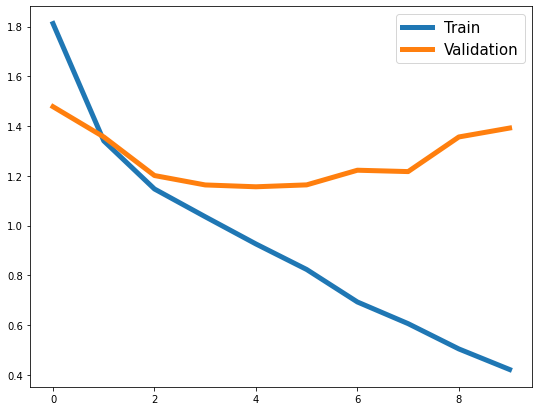

In [57]:
fig, ax = plt.subplots(figsize=(9,7))
ax.plot(history.history['loss'], label="Train", lw=5)
ax.plot(history.history['val_loss'], label="Validation", lw=5)
ax.legend(fontsize=15);

Find the best model:

In [58]:
np.argmin(history.history["val_loss"])

4

Load the best model:

In [59]:
print("Loading model %i" % (np.argmin(history.history["val_loss"]) + 1))
model.load_weights('%s/cp-%04d.ckpt' % (checkpoint_dir, np.argmin(history.history["val_loss"]) + 1))

Loading model 5


Evaluate the model again to check it's correct:


In [60]:
model.evaluate(test_outdoor,  test_labels_outdoor, verbose=2)

32/32 - 0s - loss: 1.1558 - accuracy: 0.6240 - 137ms/epoch - 4ms/step


[1.155796766281128, 0.6240000128746033]

# Make predictions

In [61]:
predictions = model.predict(test_outdoor)

32/32 [==============================] - 0s 4ms/step


In [62]:
predictions[1], len(predictions[1])

(array([ 0.05877569, -1.2018834 , -0.85176516,  1.8038765 , -0.8213306 ,
        -1.7986546 ,  3.7190654 , -3.2670615 , -5.2698584 , -3.550037  ],
       dtype=float32),
 10)

In [63]:
np.argmax(predictions[1]), label2name_outdoor[np.argmax(predictions[1])]

(6, 'forest')

In [64]:
test_labels_outdoor[1]

array([6])

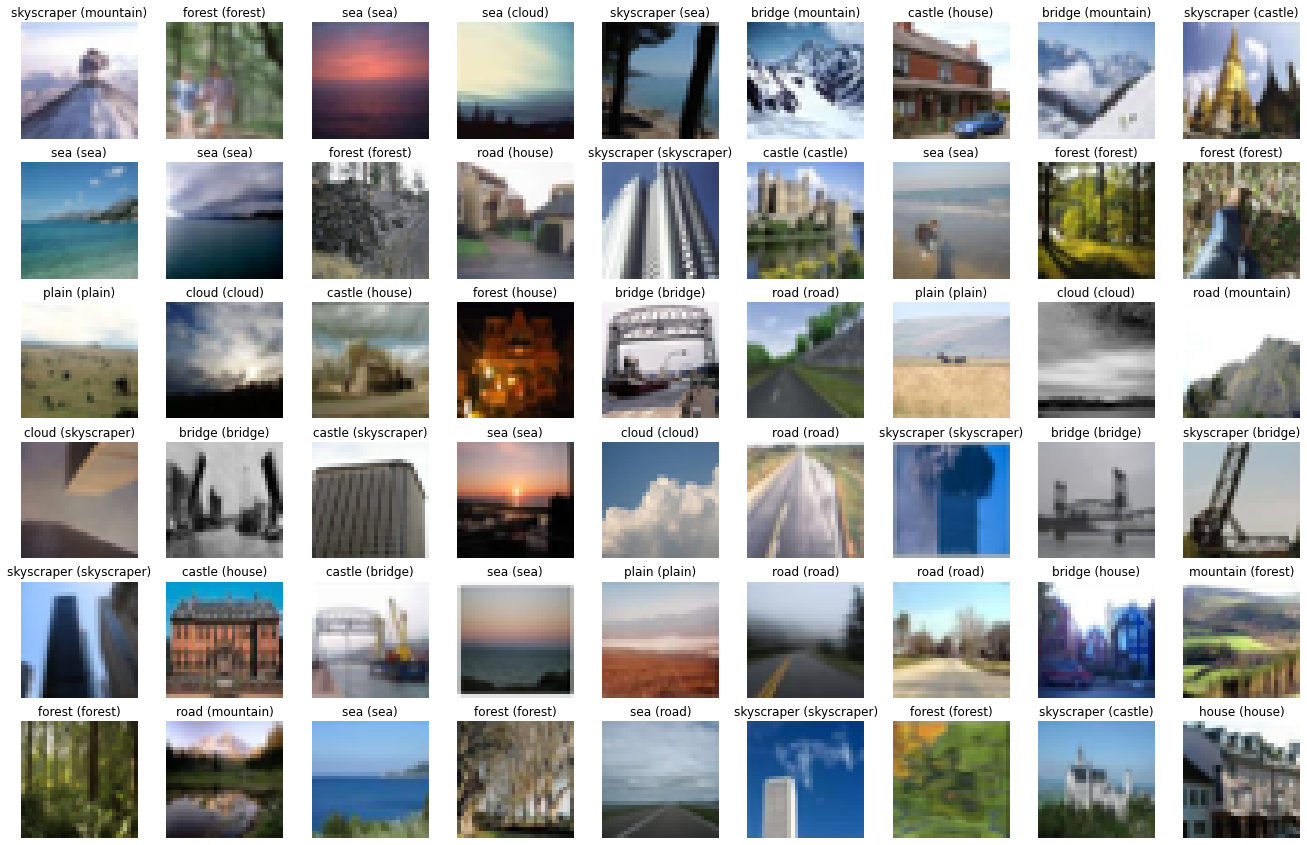

In [65]:
fig, ax = plt.subplots(ncols=9, nrows=6, figsize=(23, 15))
for i in range(6):
    for j in range(9):
        idx = 9 * i + j
        ax[i, j].imshow(test_outdoor[idx])
        ax[i, j].axis(False)
        ax[i, j].set_title("%s (%s)" % (label2name_outdoor[np.argmax(predictions[idx])], label2name_outdoor[test_labels_outdoor[idx][0]]), fontsize=12)

Confusion matrix, without normalization


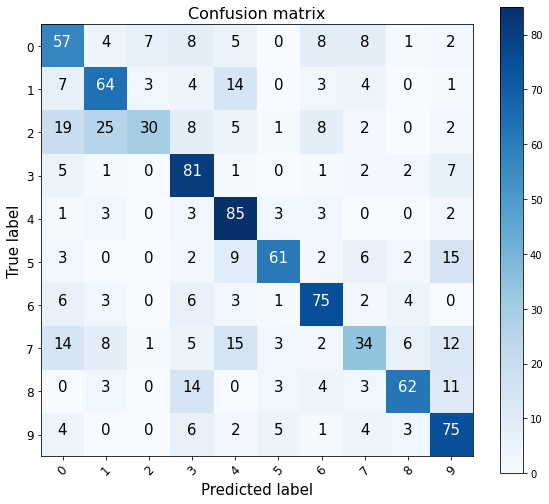

In [66]:
plt.figure(figsize=(8,7))
plot_confusion_matrix(confusion_matrix(test_labels_outdoor, np.argmax(predictions, axis=1)), range(10))

In [67]:
label2name_outdoor

{0: 'bridge',
 1: 'castle',
 2: 'house',
 3: 'road',
 4: 'skyscraper',
 5: 'cloud',
 6: 'forest',
 7: 'mountain',
 8: 'plain',
 9: 'sea'}